#### Explain methodology and terminology used

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

After reading data sets it comes natural to take a sneak peek at it, but as number of rows is too huge, only taking a look at top few rows to get the basic insight on data should be enough

In [42]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We can see columns,data structure and also notice data types easily.
But to get the actual data types, non-null data using info method would be more appropriate.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The basic and most important information about our data/columns is displayed. This helps us to in determinining better and appropriate techniques to use on different types of data

In [44]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Describe function shows us the basic statistical values of numeral columns in the data set

#### Now let's dig in

Let's look at the total number of (individual) participations in Olympics so far!

In [59]:
data['ID'].nunique()

135571

The distribution of participants based on gender is as follows!

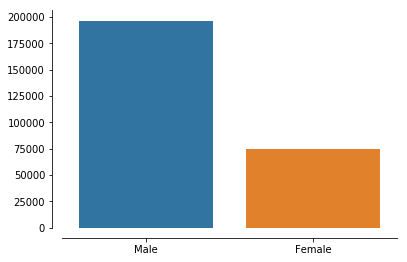

In [83]:
male_participants = data['Sex'].loc[data['Sex'] == 'M'].count()
female_participants = data['Sex'].loc[data['Sex'] == 'F'].count()
sns.barplot(x=['Male','Female'],y=[male_participants,female_participants])
sns.despine(offset=10)

Clearly, male participation is more than the double of female participation

But the question is, __was that the case since forever__
for that let's look at the yearly participation of males and females in Olympics.

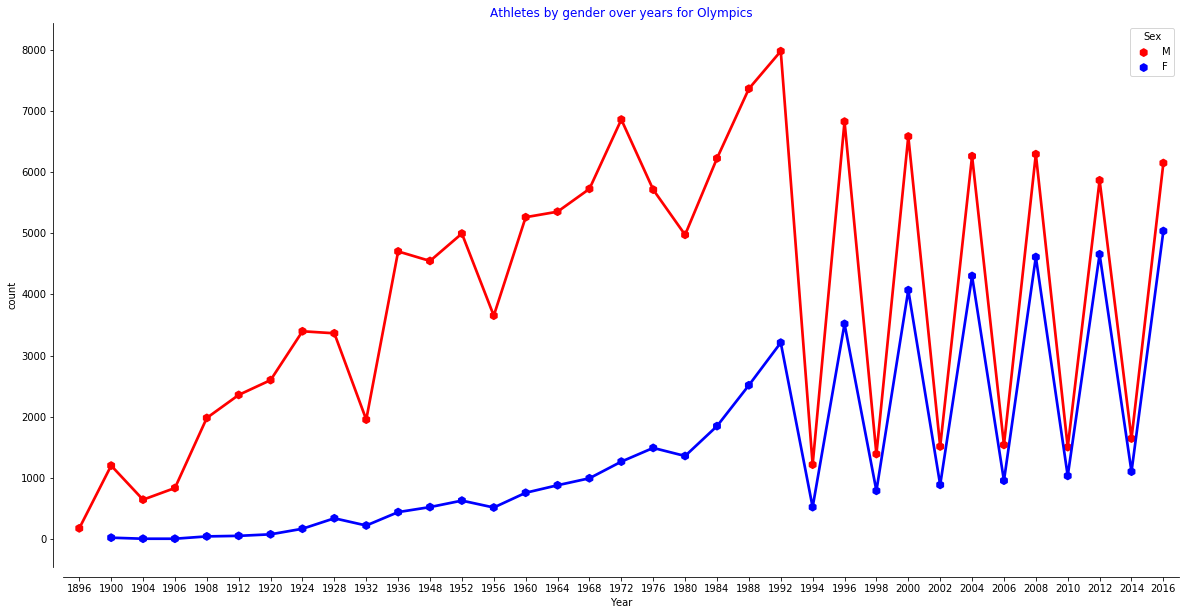

In [134]:
d = data.groupby(['Year','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,10))
sns.pointplot(x = d["Year"] , y = d["ID"],
                   markers="h" , hue = d["Sex"],palette = ["r","b"])
plt.setp(p.collections, sizes=[15])
plt.ylabel("count")
plt.title("Athletes by gender over years for Olympics",color="b")
sns.despine(offset=10)
#plt.xticks(rotation = 60)


In [ ]:
sns.catplot(x=participation, y=data['Year'].unique() , kind="bar", palette="muted")

Let's look at the **Participation of different countires** in Olympics (1896 - 2016)

In [6]:
per_country_participation = data['NOC'].value_counts()

In [7]:
#p = sns.barplot(x=per_country_participation.index,y=per_country_participation.values,orient='h')

#Orient parameter here should have resolveed the xlabel overlapping issue but it was generating a weird error that,
#so far, I have been unable to resolve.

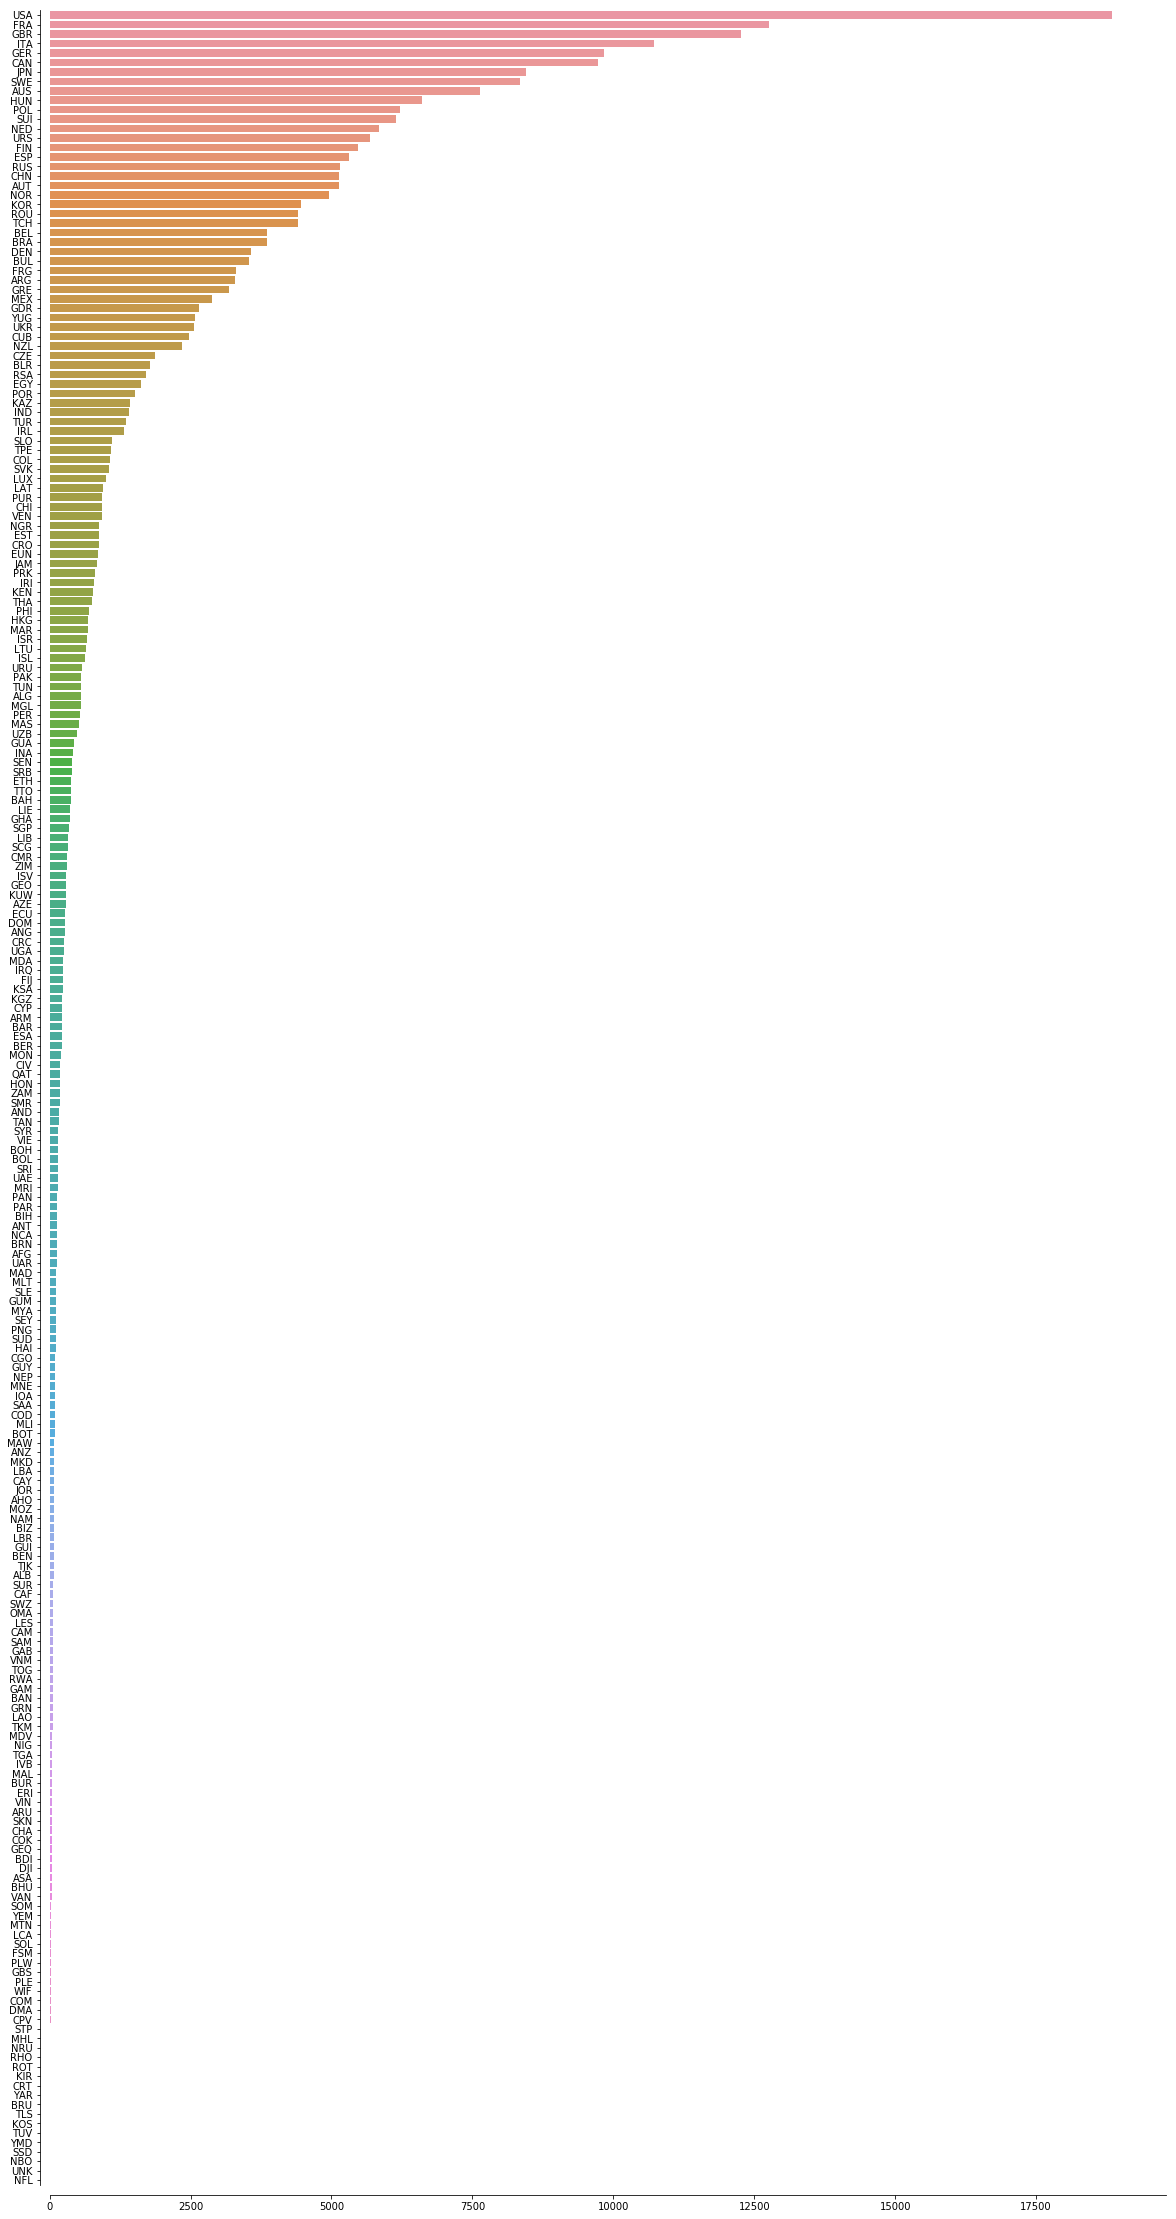

In [8]:
plt.figure(figsize=(20,40))
sns.barplot(y=per_country_participation.index,x=per_country_participation.values)
sns.despine(offset=10)

###### What did I extract!
As clearly seen from the graph the most participating country in Olympics is USA, followed by France > Britain and so on to NFL (New Found Land (Canada)) being the lowest participator.

###### Medals won by countries

Let's see which countries won maximum medals over the specified period of Olympics

In [9]:
medal_distribution_by_country = data.groupby('NOC')['Medal'].count()
#medal_distribution_by_country.idxmax()

In [10]:
# Filtering out countries who have won no medal so far
medal_distribution_by_country = medal_distribution_by_country[medal_distribution_by_country > 0]

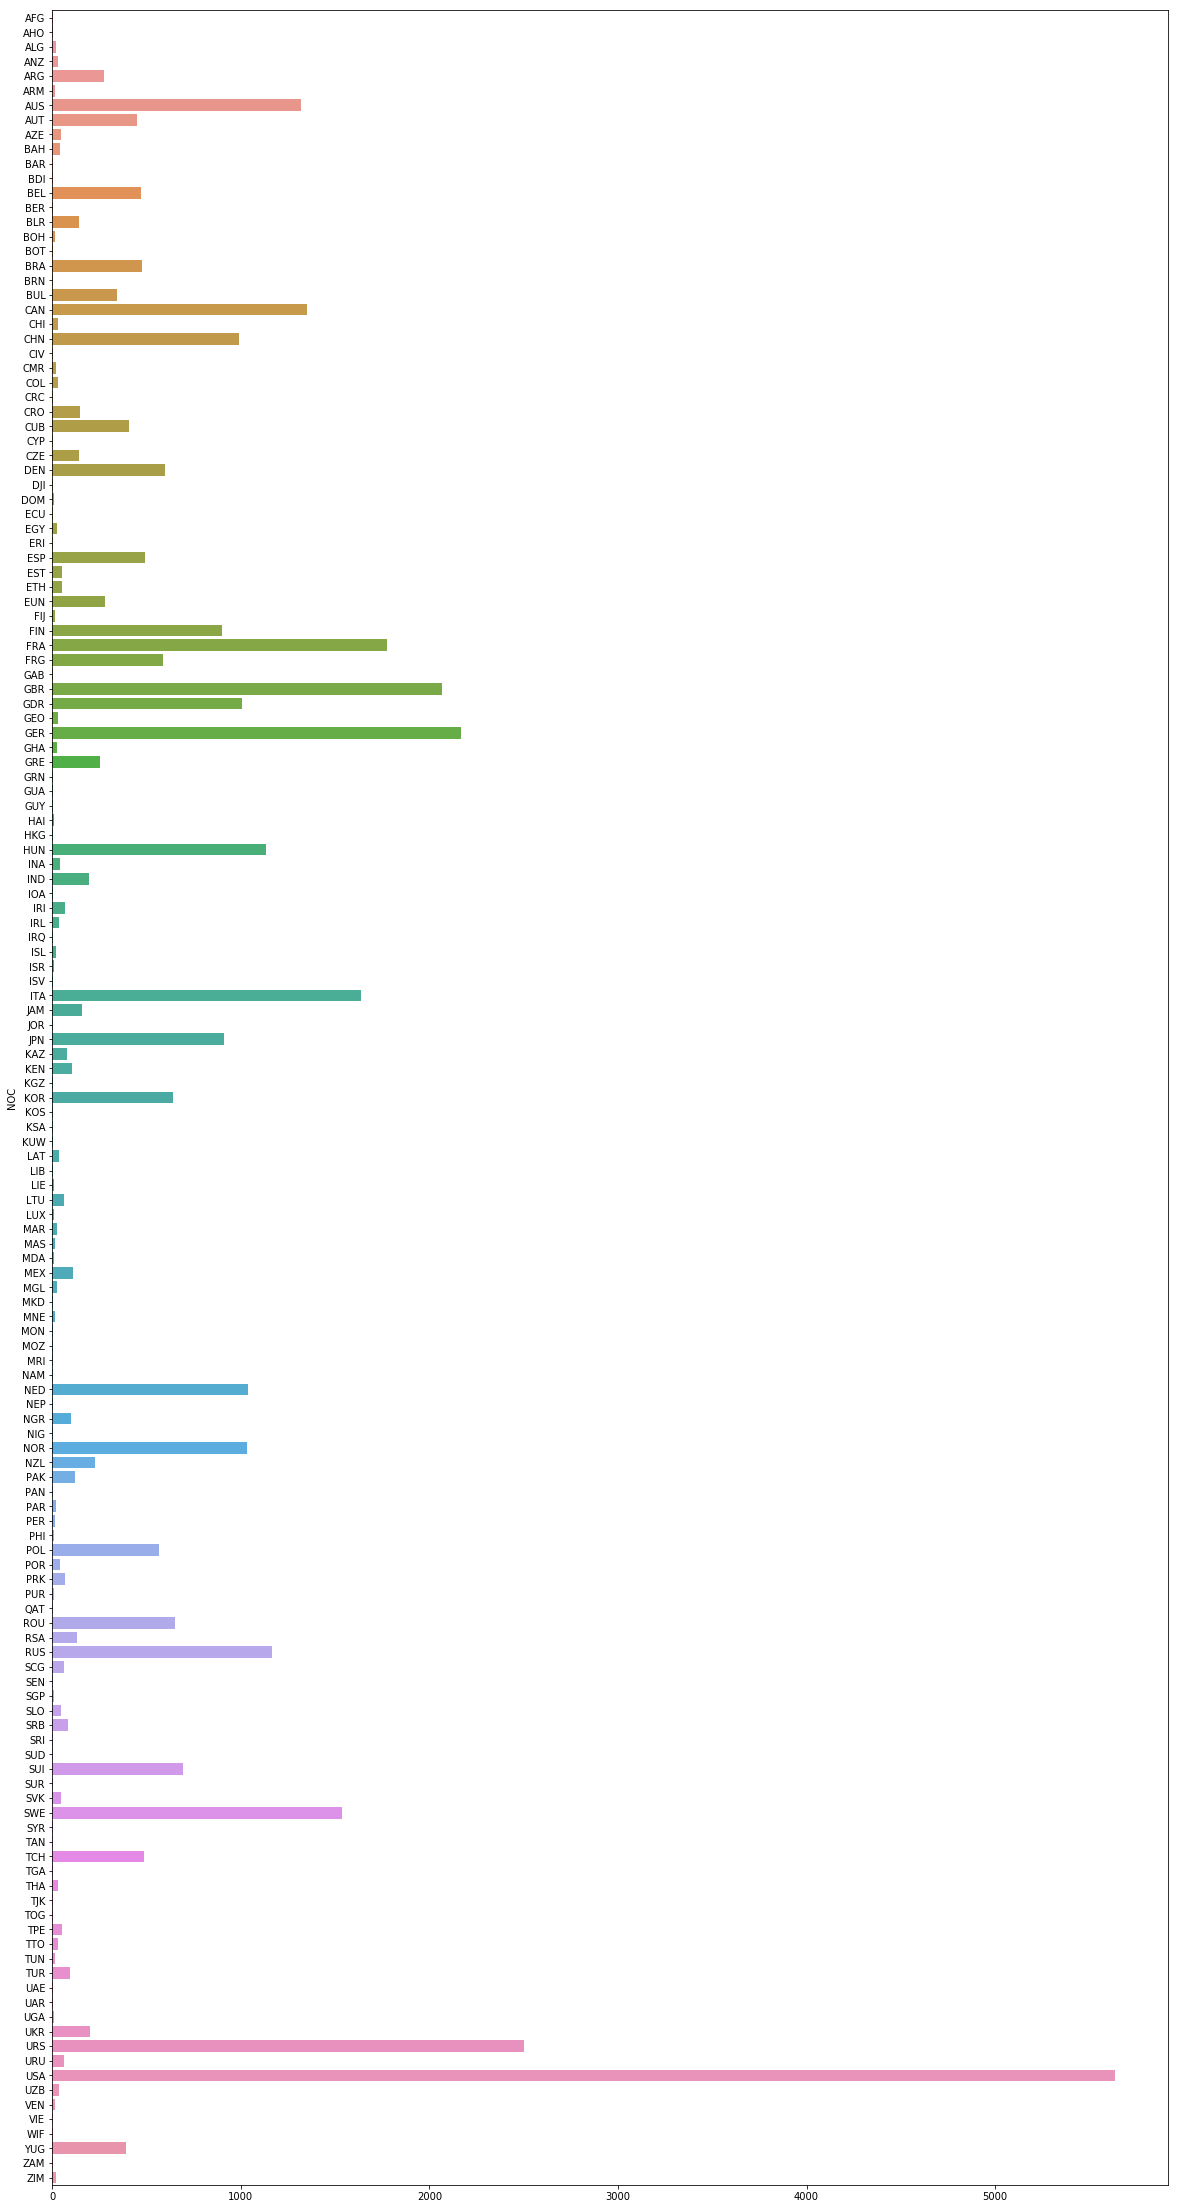

In [11]:
plt.figure(figsize=(20,40))
sns.barplot(y=medal_distribution_by_country.index,x=medal_distribution_by_country.values)

Let's look at the age distribution of athletes in olympics!

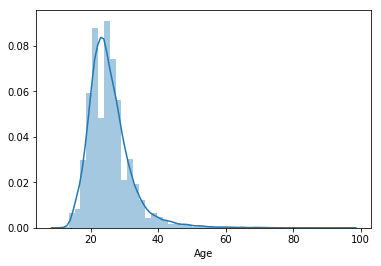

In [16]:
#Distribution of Age
sns.distplot(data['Age'].dropna())

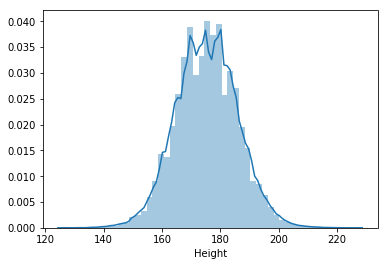

In [45]:
#Distribution of Height
sns.distplot(data['Height'].dropna())

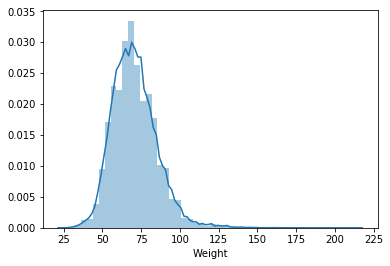

In [21]:
#Distribution of Weight
sns.distplot(data['Weight'].dropna())

In [135]:

#d = pd.concat([data['Age'], data['Medal']],axis=1)
#d.plot.scatter(x='Age', y='Age', ylim=(0,250))

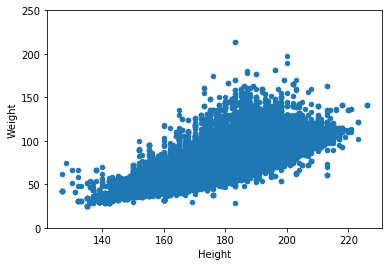

In [53]:
var = 'Height'
d = pd.concat([data['Weight'], data[var]], axis=1)
d.plot.scatter(x=var, y='Weight', ylim=(0,250))

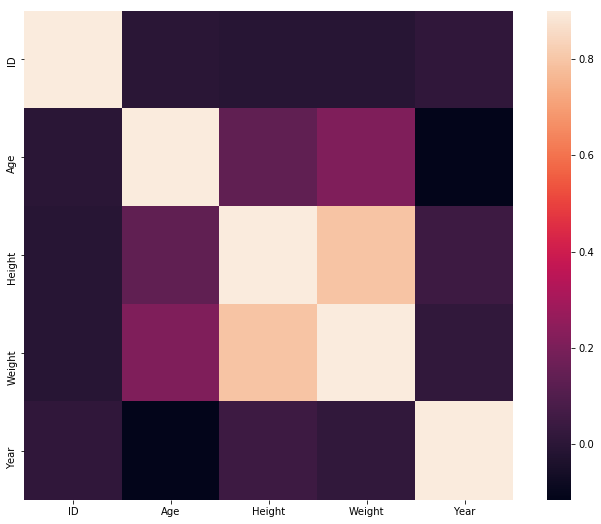

In [57]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True)

# also add Country by country, yearly participation pattern